# Group Timescales (HCP, Shine 1, Session 1, CleanGSR, BNA)

In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
subject_list = np.genfromtxt('/home/despoB/dlurie/Projects/timescale_hierarchy/data/meta/subject_lists/HCP-Shine_1.txt', dtype="U")

In [4]:
def get_timescale_data(fpt, subject_list):
    ts_store = []
    for sub_id in subject_list:
        try:
            ts_data = np.loadtxt(glob(fpt.format(sub_id))[0])
            ts_store.append(ts_data)
        except:
            print(f'Could not find data for subject {sub_id}')
    ts_store = np.array(ts_store)
    
    return ts_store 

## 20 TR decay

In [5]:
decay20_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/derivatives/sub-{0}_run-01_task-rest_acq-LR_bold_space-MNI_atlas-BNA_variant-HP2000CleanGSR_decay20.tsv', subject_list)

In [6]:
decay20_store_filt = decay20_store.copy()

Exclude (set as NaN) decay estimates of zero or those greater than the total number of lags.

In [7]:
decay20_store_filt[decay20_store_filt > 20] = np.nan

In [8]:
decay20_store_filt[decay20_store_filt == 0] = np.nan

In [9]:
np.sum(np.isnan(decay20_store_filt))

1190

In [10]:
decay20_med = np.nanmedian(decay20_store_filt, axis=0)

In [11]:
decay20_std = np.nanstd(decay20_store_filt, axis=0)

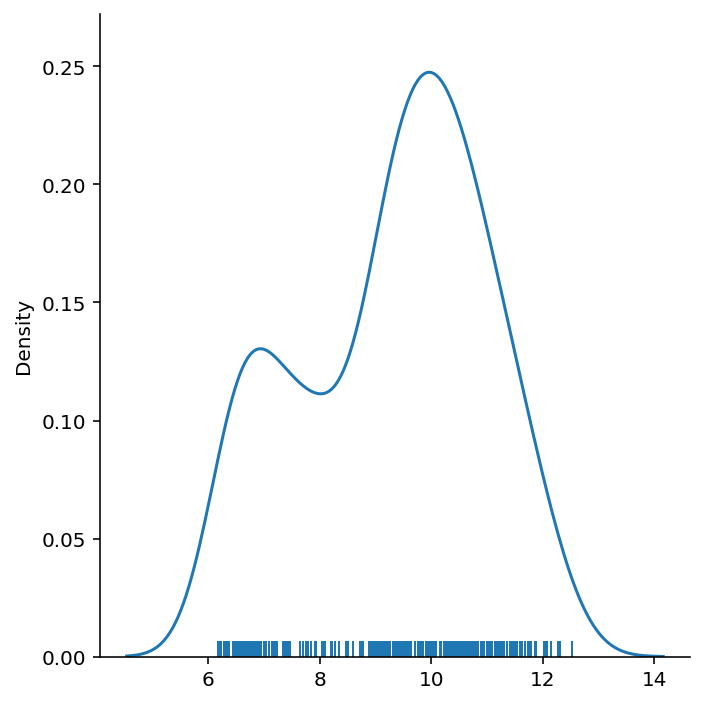

In [12]:
sns.displot(decay20_med, kind='kde', rug=True)

## 40 TR decay

In [13]:
decay40_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/derivatives/sub-{0}_run-01_task-rest_acq-LR_bold_space-MNI_atlas-BNA_variant-HP2000CleanGSR_decay40.tsv', subject_list)

In [14]:
decay40_store_filt = decay40_store.copy()

In [15]:
decay40_store_filt[decay40_store_filt > 40] = np.nan

In [16]:
decay40_store_filt[decay40_store_filt == 0] = np.nan

In [17]:
np.sum(np.isnan(decay40_store_filt))

0

In [18]:
decay40_med = np.nanmedian(decay40_store_filt, axis=0)

In [19]:
decay40_std = np.nanstd(decay40_store_filt, axis=0)

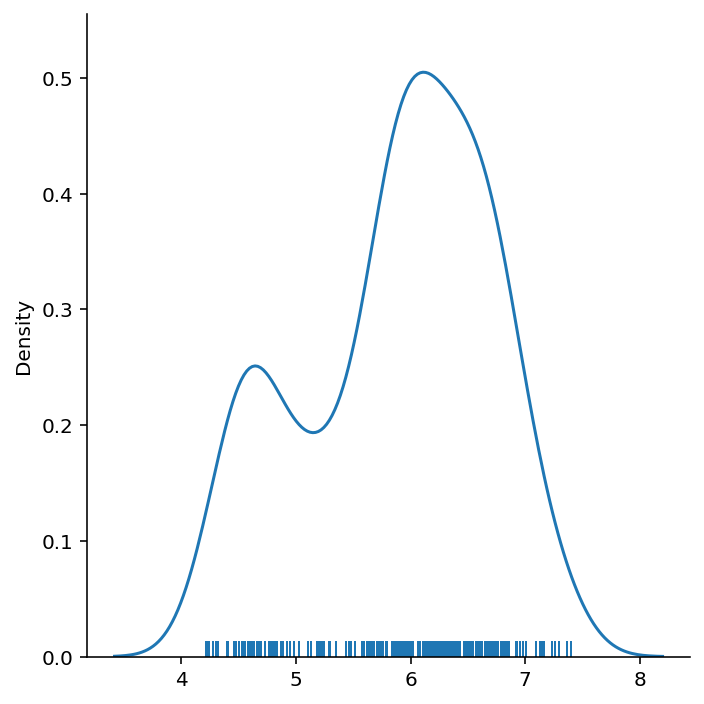

In [20]:
sns.displot(decay40_med, kind='kde', rug=True)

## Lag-1 Autocorrelation

In [21]:
lag1_store = get_timescale_data('/home/despoB/dlurie/Projects/timescale_hierarchy/data/hcp/derivatives/sub-{0}_run-01_task-rest_acq-LR_bold_space-MNI_atlas-BNA_variant-HP2000CleanGSR_lag1.tsv', subject_list)

In [22]:
lag1_med = np.nanmedian(lag1_store, axis=0)

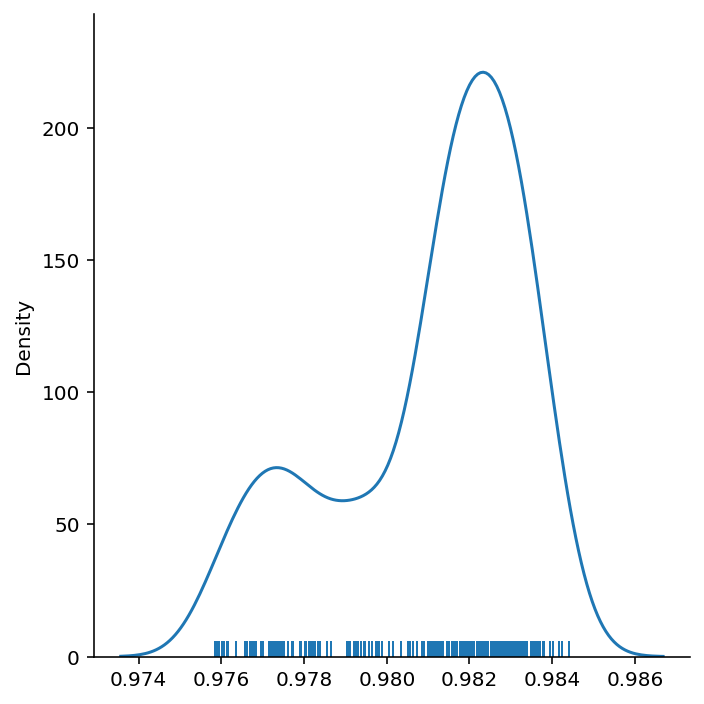

In [23]:
sns.displot(lag1_med, kind='kde', rug=True)

In [24]:
lag1_z_store = stats.zscore(lag1_store, axis=1)

In [25]:
lag1_z_med = np.nanmedian(lag1_z_store, axis=0)

r=0.9944985100147052, p=4.250986171033167e-241


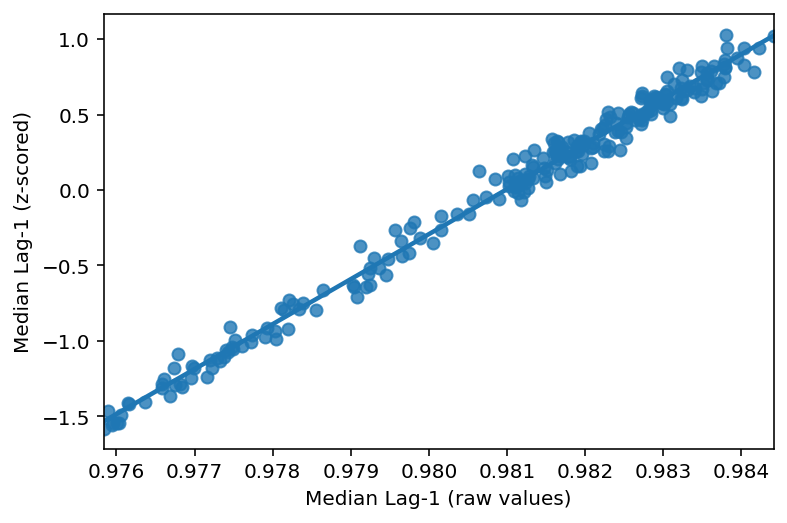

In [26]:
sns.regplot(x=lag1_med, y=lag1_z_med)
plt.xlabel('Median Lag-1 (raw values)')
plt.ylabel('Median Lag-1 (z-scored)')
r, p = stats.pearsonr(lag1_med, lag1_z_med)
print(f'r={r}, p={p}')

In [27]:
lag1_std = np.nanstd(lag1_store, axis=0)

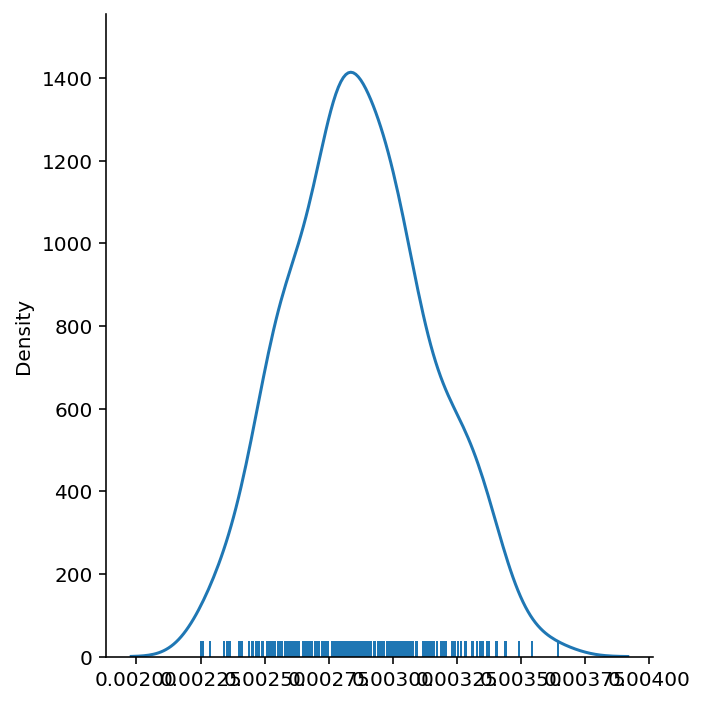

In [28]:
sns.displot(lag1_std, kind='kde', rug=True)

In [29]:
lag1_z_std = np.std(lag1_z_store, axis=0)

r=0.5518425580783497, p=5.247965149098117e-21


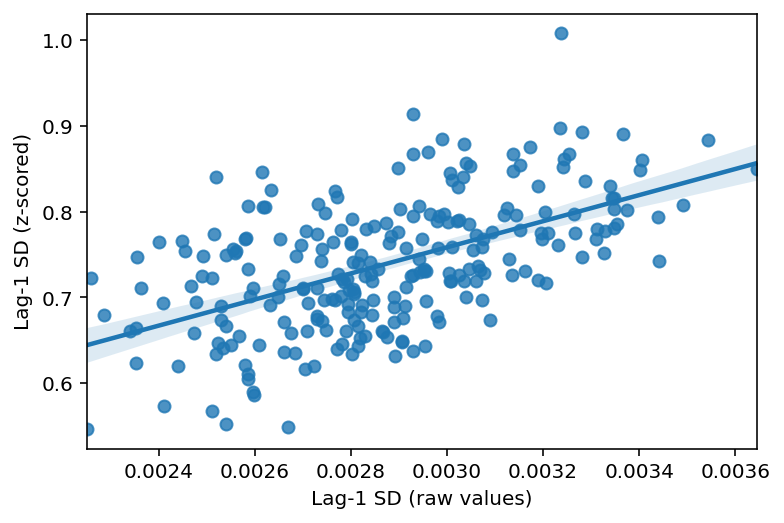

In [30]:
sns.regplot(x=lag1_std, y=lag1_z_std)
plt.xlabel('Lag-1 SD (raw values)')
plt.ylabel('Lag-1 SD (z-scored)')
r, p = stats.pearsonr(lag1_std, lag1_z_std)
print(f'r={r}, p={p}')

## Compare and save timescales

In [31]:
ts_df = pd.DataFrame([decay20_med, decay40_med, lag1_med, decay20_std, decay40_std, lag1_std, lag1_z_std, lag1_z_med])

In [32]:
ts_df = ts_df.T

In [33]:
ts_df.columns = ['decay20_median', 'decay40_median', 'lag1_median', 'decay20_std', 'decay40_std', 'lag1_std', 'lag1_z_std', 'lag1_z_med']

Text(0.5, 1.02, 'Correlation Between Timescale Measures')

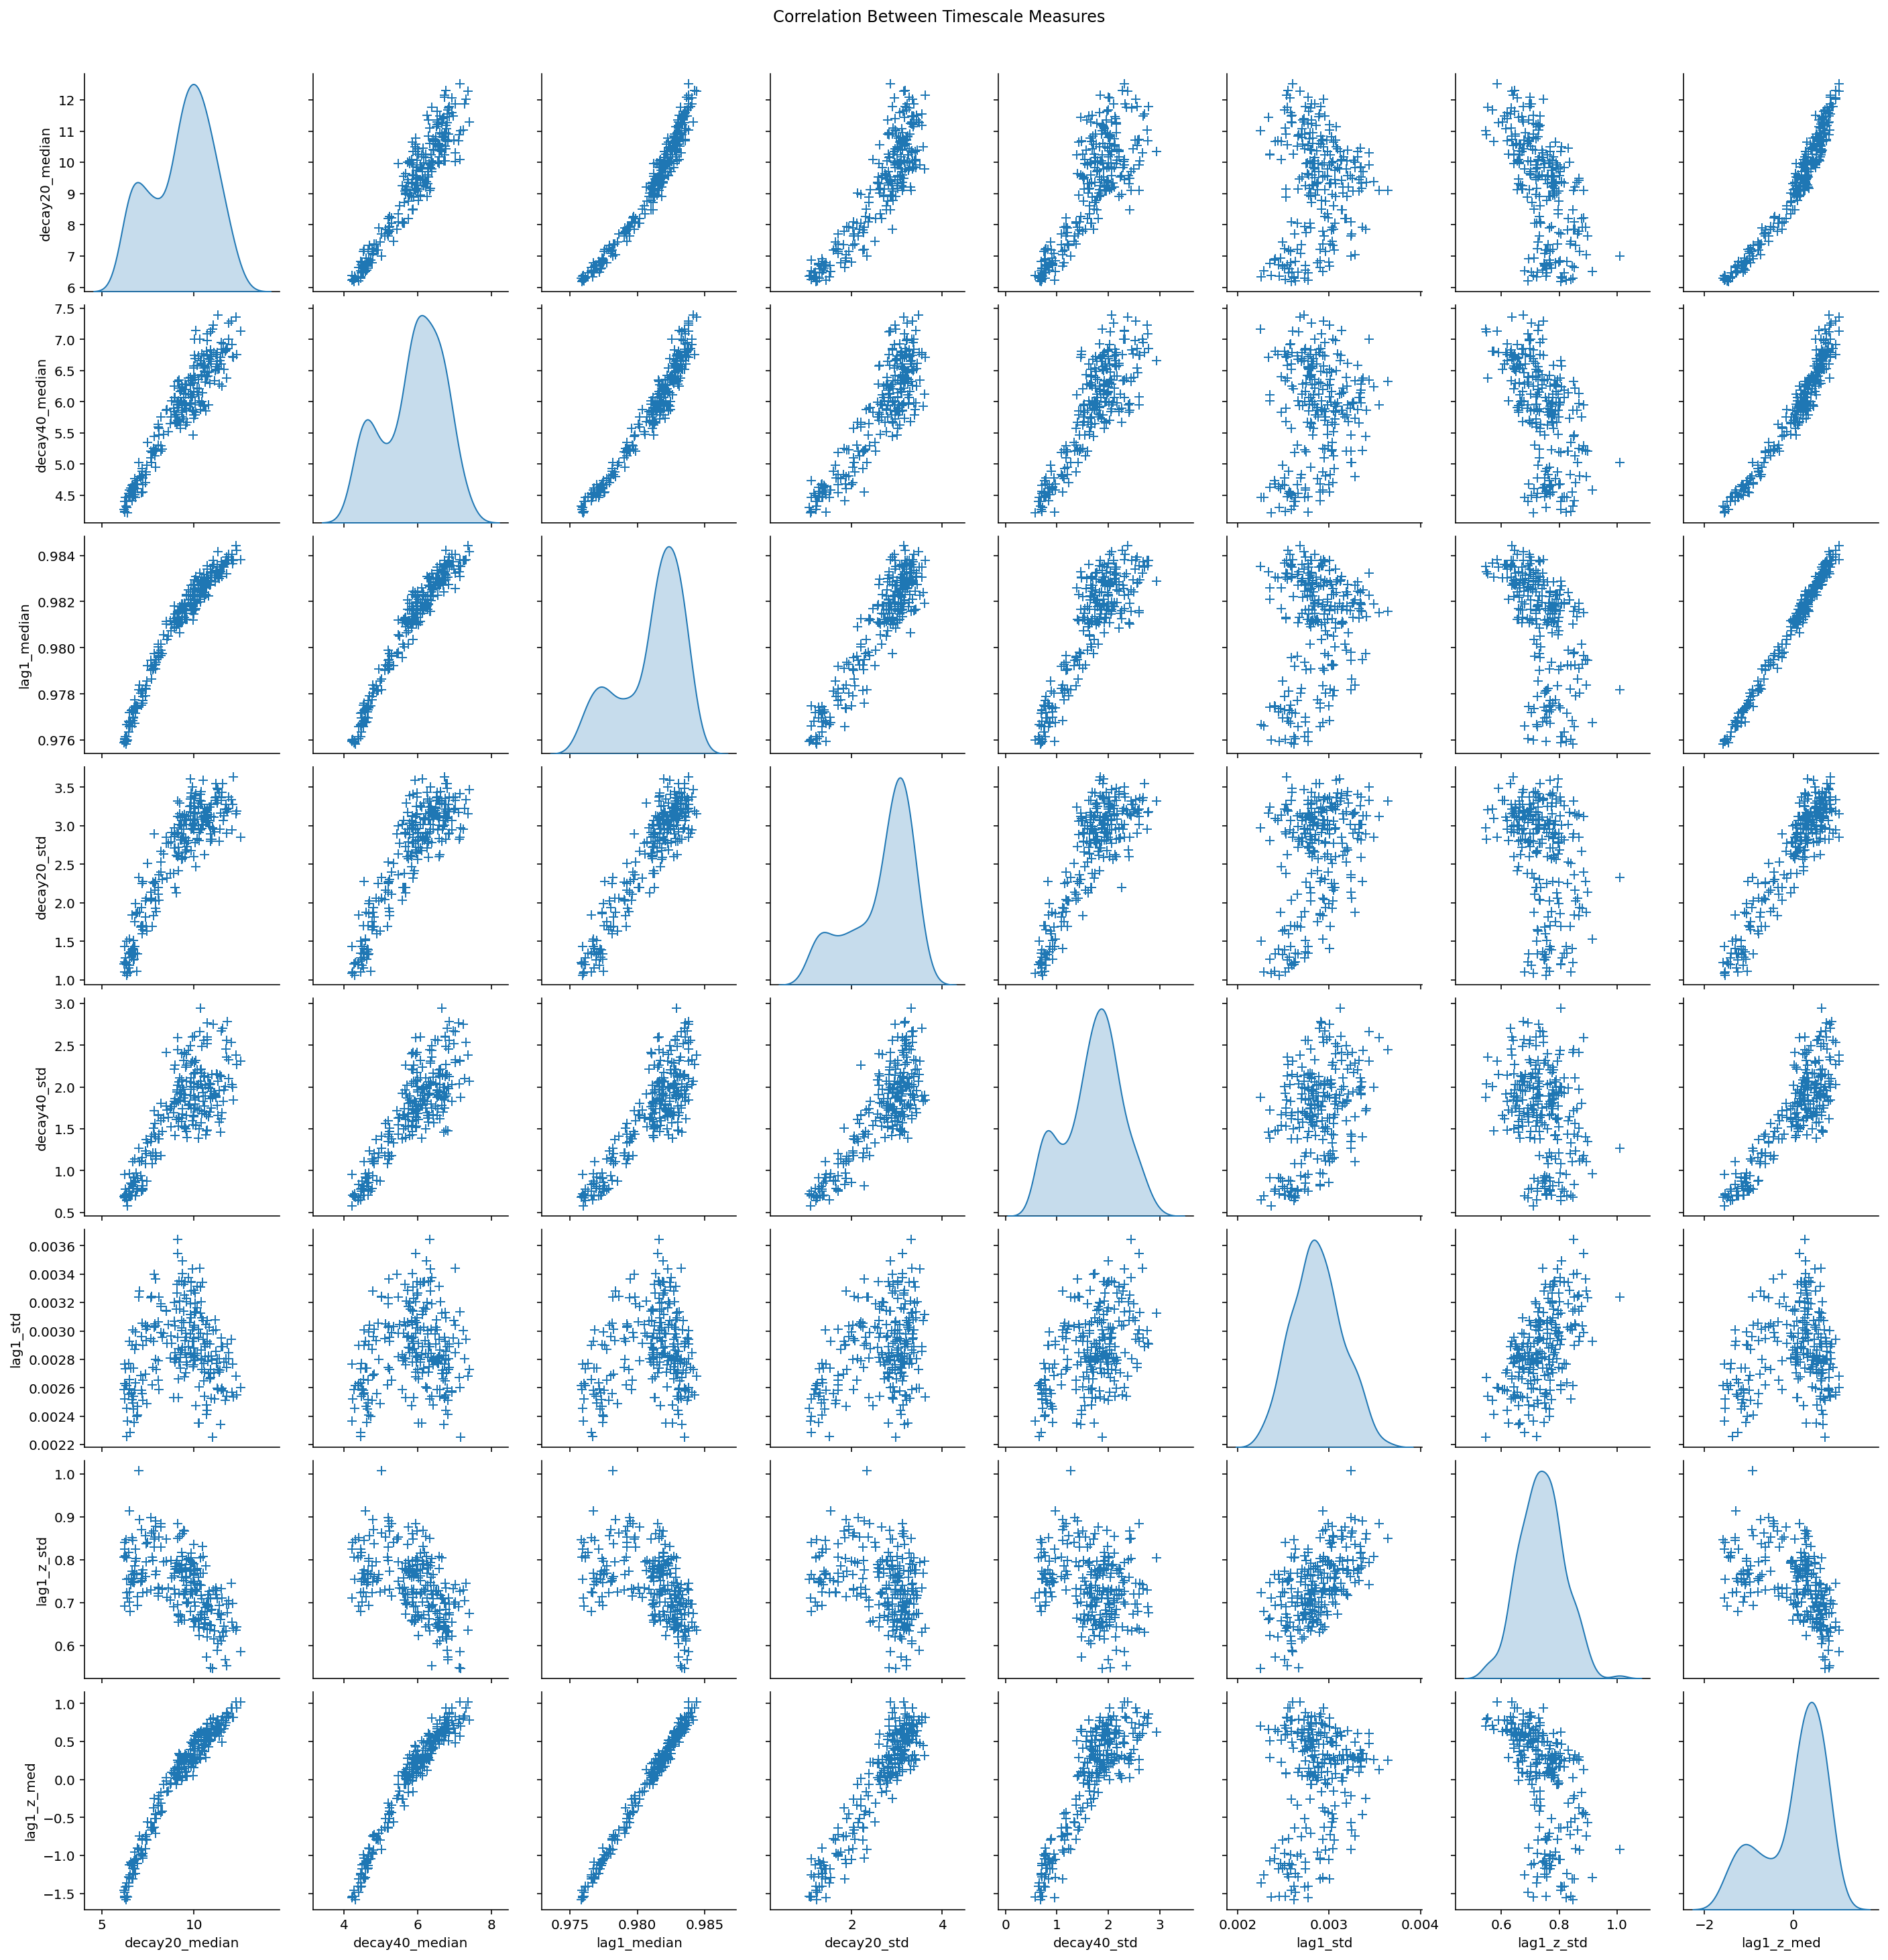

In [34]:
g = sns.pairplot(ts_df, diag_kind='kde', markers='+',
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.suptitle("Correlation Between Timescale Measures", y=1.02)

In [35]:
ts_df.to_csv('../../../results/timescales/HCP_Shine1_Session1_CleanGSR_BNA_timescale_df.csv')

### Visualize correlation between timescale estimates (for SI)

In [36]:
timescales_df = ts_df.iloc[:,0:3].copy()

In [37]:
timescales_df.columns = ['Decay (short)','Decay (long)','Lag-1']

In [38]:
sns.set_style('ticks')
sns.set_context('notebook')

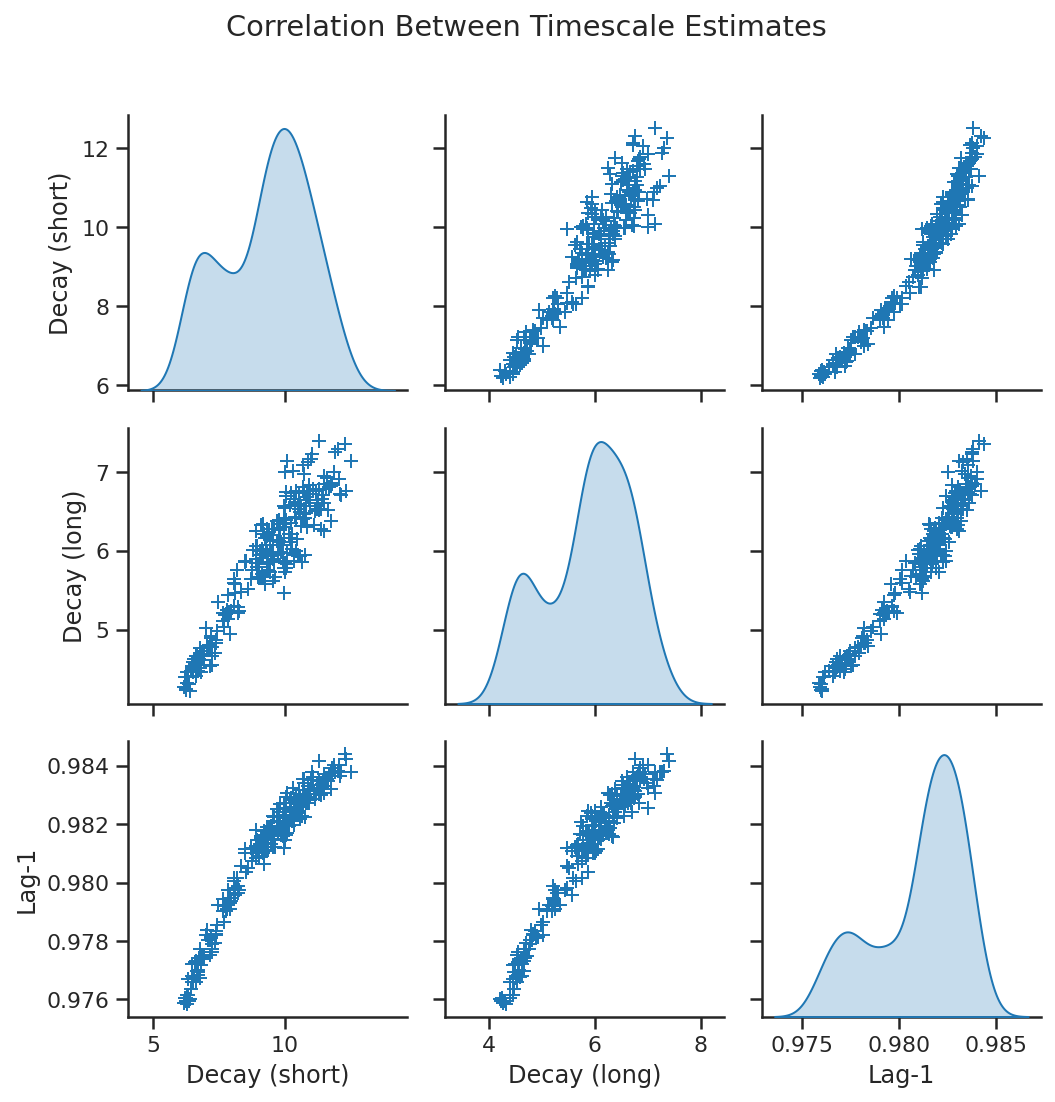

In [39]:
g = sns.pairplot(timescales_df, diag_kind='kde', markers='+',
             plot_kws=dict(s=50, edgecolor="b", linewidth=1),
             diag_kws=dict(shade=True))
plt.suptitle("Correlation Between Timescale Estimates", y=1.02)
plt.tight_layout()

In [40]:
timescales_df.corr()

,Decay (short),Decay (long),Lag-1
Decay (short),1.000000,0.941780,0.971415
Decay (long),0.941780,1.000000,0.970896
Lag-1,0.971415,0.970896,1.000000
